# <center>Unsupervised Learing: Text Clustering</center>

References:
* https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf
* http://infolab.stanford.edu/~ullman/mmds/ch7.pdf
* http://www.cs.columbia.edu/~smaskey/CS6998-0412/slides/week3_statnlp_web.pdf

## 1. Clustering vs. Classification
* Clustering (Unsupervised): divide a set of objects into clusters (parts of the set) so that objects in the same cluster are similar to each other, and/or objects in different clusters are dissimilar.
  * Representation of the objects
  * Similarity/distance measure
* Classifification (Supervised): group objects into predetermined categories
  * Representation of the objects
  * A training set

## 2. Why clustering
* Example: Google News - https://news.google.com/topstories?hl=en-US&gl=US&ceid=US:en
* Understand conceptually meaningful groups of objects that share common characteristics 
* Provides an abstraction from individual data objects to the clusters in which those data objects reside
* Uses of clustering
  * Summarization
  * Compression
  * Efficiently finding nearest neighbors

## 3. Types of Clusterings 
* Different kinds of models (https://www.geeksforgeeks.org/different-types-clustering-algorithm/):
  - Centroid models (partition): 
     - Similarity is derived as the closeness of a data point to the centroid of clusters. 
     - Flat partition, e.g. K-Means
     <img src='centroid.png' width="40%">
  - Connectivity models (Hierarchical algorithms): 
     - Data points closer in data space exhibit more similarity to each other than the data points lying farther away.      
     - Hierarchy of clusters, e.g. agglomerative clustering
     <img src='connectivity.png' width="40%">
  - Distribution models: 
     - How probable is it that all data points in the cluster belong to the same distribution, concept, or topic
     - e.g. Latent Semantics Analysis, Latent Dirichlet Allocation (LDA)
     <img src='distribution.png' width="40%">
  - Density models: clusters correspond to areas of varied density of data points in the data space
     - e.g. DBSCAN
     <img src='density.png' width="40%">
* Exclusive vs. Overlapping
  - Exclusive: each object is assigned to a single cluster, e.g. K-Means
  - Overlapping (non-exclusive): an object can simultaneously belong to more than one cluster, e.g. LDA

## 4. Evaluation of Clustering: What is a good clustering
### 4.1 External Evaluation (a subset of data manually labeled for evalution): 
* External evaluation measures the degree to which predicted clustering labels correspond to actual class labels  
* **Precision** and **Recall**

### 4.2. Internal Evaluation 
<img src='cohension_separation.png' width="60%">
* **Distortion (SSD)**: sum of squares distance of objects in a cluster to the cluster center. We want to minimize $SSD$.
$$ SSD = \sum_k{\sum_i{(x_{k,i} - \mu_k)^2}}, \text{where}~\mu_k~\text{is the center of cluster}~k,x_{k,i}~\text{is the}~i\text{th object in the cluster}~k$$
* **Cohension (Intra-cluster similarity)**: how "cohesive" a cluster is, i.e. the average similarity of objects in the same cluster. 
   - e.g. cluster radius: $\max{d(x, μ_A)}$ where $μ_A$ is the arithmetic mean of cluster A and $x$ is a point in A
   - e.g. cluster diameter: $\max{d(x, y)}$ where $x,y$ are two points in cluster A

* **Separation (Inter-cluster dissimilarity)**: how "separate" a cluster from another, i.e. the average similarity of all samples in cluster $A$ to all the samples in cluster $B$.
   - e.g. Separation can be calculated as average distance: $\frac{1}{|A|*|B|}\sum_{x \in A}{\sum_{y \in B}{d(x, y)}}$ 
* Metrics with combined cohension and separation (http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)
   - Silhouette Coefficient: $s=\frac{b-a}{\max(a,b)}$, where $a$: the mean distance between a sample and all other points in the same cluster, and $b$: the mean distance between a sample and all other points in the next nearest cluster. $s \in [-1, 1]$.
   - Calinski-Harabaz Index: $s=\frac{b}{a}$ where $a$ is mean within\-cluster separation, and $b$ is the mean between\-cluster separation

## 5. K-Means
### 5.1. Algorithm outline: Cluster objects into K clusters

- Algorithm: 
    1. Select K points as initial centroids 
    2. Repeat until centroids do not change:
        1. Form K clusters by assigning each point to its closest centroid by distance.
        2. Recompute the centroid of each cluster as the arithmetic mean of samples within the cluster. 
<img src='kmean.png'  width='80%'/>


- A few observations of K-means:
  - Initial centroids have an impact on clustering. Usually, several rounds of clustering with random initial centroids are performed, and the best one is reported.
  - Centroids and distance measure are crtical in the algorithm
     - **Euclidean distance**: 
       - The best centroid for minimizing the average distance from all samples to the centroid is the mean of points in the cluster (https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)
       - Curse of dimensionality
       - Sensitive to outliers
     - **Cosine similarity**: 
       * Well-accepted similarity measure for documents
       * It is not guaranteed that the mean of samples in a cluster is the best centroid 
       * For text clustering, the centroid does not stand for an actual document. How to interpret clusters?
     - A modified version of Kmeans is called **K-medoids**, where a representative sample is choosen as the center of a cluster, called as a medoid. 
- Python packages for Kmean
  * NLTK: can choose Euclidean or Cosine similarity as distance measure
  * Sklearn: only Euclidean distance is supported  

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Exercise 5.1.1 Load data and generate TF-IDF
# Load datasets (http://qwone.com/~jason/20Newsgroups/)
# A subset is loaded

import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv("../twenty_news_data.csv",\
               header=0)

# Select three labels for now
labels =['comp.graphics', 'soc.religion.christian',\
         'sci.med']
data=df[df["label"].isin(labels)]

# Split dataset into training and test. 
# Assuming we only know ground-truth label 
# for the test set.

train, test = train_test_split(data, test_size=0.2, random_state=0)

# print out the full text of the first sample
print(data["text"][0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [6]:
# Exercise 5.1.2
# initialize the TfidfVectorizer 
# set min document frequency to 5

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords

# set the min document frequency to 5
# generate tfidf matrix
tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 

dtm= tfidf_vect.fit_transform(train["text"])
print (dtm.shape)

(1421, 5925)


In [7]:
# Exercise 5.1.3 Clustering using NLTK KMean
# cosine distance is calculated

from nltk.cluster import KMeansClusterer, \
cosine_distance

# set number of clusters
num_clusters=3

# initialize clustering model
# using cosine distance
# clustering will repeat 20 times
# each with different initial centroids
clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, \
                            repeats=20)

# samples are assigned to cluster labels 
# starting from 0
clusters = clusterer.cluster(dtm.toarray(), \
                             assign_clusters=True)

#print the cluster labels of the first 5 samples
print(clusters[0:5])

[2, 0, 0, 0, 0]


In [8]:
# Exercise 5.1.4 Interpret each cluster by centroid

# a centroid is the arithemtic mean 
# of all samples in the cluster
# it may not stand for a real document

# find top words at centroid of each cluster
from sklearn import metrics
import numpy as np

# clusterer.means() contains the centroids
# each row is a cluster, and 
# each column is a feature (word)
centroids=np.array(clusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
voc_lookup= tfidf_vect.get_feature_names()

for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
    top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
    print("Cluster %d:\n %s " % (i, "; ".join(top_words)))

Cluster 0:
 edu; graphics; com; posting; host; nntp; lines; subject; organization; university; thanks; uk; files; image; 3d; ac; program; file; software; windows 
Cluster 1:
 edu; pitt; msg; com; banks; geb; gordon; cs; article; science; food; writes; dyer; organization; don; subject; disease; lines; people; medical 
Cluster 2:
 god; edu; jesus; church; christians; people; bible; christian; christ; believe; faith; think; hell; rutgers; know; truth; don; subject; christianity; com 


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 5.2. How to evaluate clustering
- External evaluation:
  - Obtain "ground truth": if data is not labeled, manually label a random subset of samples as "ground truth" 
  - Assign each cluster to a "true" class by the **majority vote rule**
  - Calculate precision and recall
  
  
  | Cluster ID      | Ground Truth Class Label   |
  | :------------- |:----------------------------|
  | 0      | comp.graphics|
  | 1      | sci.med  |
  | 2      | soc.religion.christian|
  
- Internal evaluation
  - Silhouette Coefficient
  - Calinski-Harabaz Index
  - ...
- Sometimes, you can visualize the cluster after dimension reduction (e.g. PCA)

In [9]:
# Exercise 5.2.1 Predict labels for new samples

# Question: how to determine 
# the label for a new sample?

# note transform function is used
# not fit_transform
test_dtm = tfidf_vect.transform(test["text"])

predicted = [clusterer.classify(v) for v in test_dtm.toarray()]

predicted[0:10]

[1, 0, 0, 1, 0, 2, 2, 1, 2, 2]

In [23]:
test["label"].values

array(['sci.med', 'sci.med', 'comp.graphics', 'sci.med', 'comp.graphics',
       'soc.religion.christian', 'soc.religion.christian', 'sci.med',
       'soc.religion.christian', 'soc.religion.christian', 'sci.med',
       'soc.religion.christian', 'comp.graphics', 'comp.graphics',
       'comp.graphics', 'soc.religion.christian',
       'soc.religion.christian', 'comp.graphics', 'sci.med',
       'comp.graphics', 'soc.religion.christian', 'comp.graphics',
       'soc.religion.christian', 'soc.religion.christian',
       'comp.graphics', 'comp.graphics', 'sci.med', 'sci.med', 'sci.med',
       'soc.religion.christian', 'soc.religion.christian',
       'comp.graphics', 'soc.religion.christian', 'comp.graphics',
       'sci.med', 'sci.med', 'soc.religion.christian', 'comp.graphics',
       'sci.med', 'sci.med', 'soc.religion.christian', 'sci.med',
       'comp.graphics', 'sci.med', 'soc.religion.christian',
       'soc.religion.christian', 'sci.med', 'sci.med', 'sci.med',
       'comp.grap

In [10]:
# Exercise 5.2.2 External evaluation
# determine cluster labels and calcuate precision and recall

# Create a dataframe with cluster id and 
# ground truth label
confusion_df = pd.DataFrame(list(zip(test["label"].values, predicted)),\
                            columns = ["label", "cluster"])
confusion_df.head()

# generate crosstab between clusters and true labels
pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)

,label,cluster
0,sci.med,1
1,sci.med,0
2,comp.graphics,0
3,sci.med,1
4,comp.graphics,0


label,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,107,16,6
1,0,112,3
2,0,1,111


In [11]:
# Exercise 5.2.3 
# Map cluster id to true labels by "majority vote"
cluster_dict={0:'comp.graphics',\
              1:"sci.med",\
              2:'soc.religion.christian'}

# Map true label to cluster id
predicted_target=[cluster_dict[i] \
                  for i in predicted]

print(metrics.classification_report\
      (test["label"], predicted_target))

                        precision    recall  f1-score   support

         comp.graphics       0.83      1.00      0.91       107
               sci.med       0.97      0.87      0.92       129
soc.religion.christian       0.99      0.93      0.96       120

              accuracy                           0.93       356
             macro avg       0.93      0.93      0.93       356
          weighted avg       0.94      0.93      0.93       356



You may be able to visualize the data with dimension reduction techniques such as `PCA`, `t-SNE` (t-distributed stochastic neighbor embedding)

<Figure size 1600x400 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

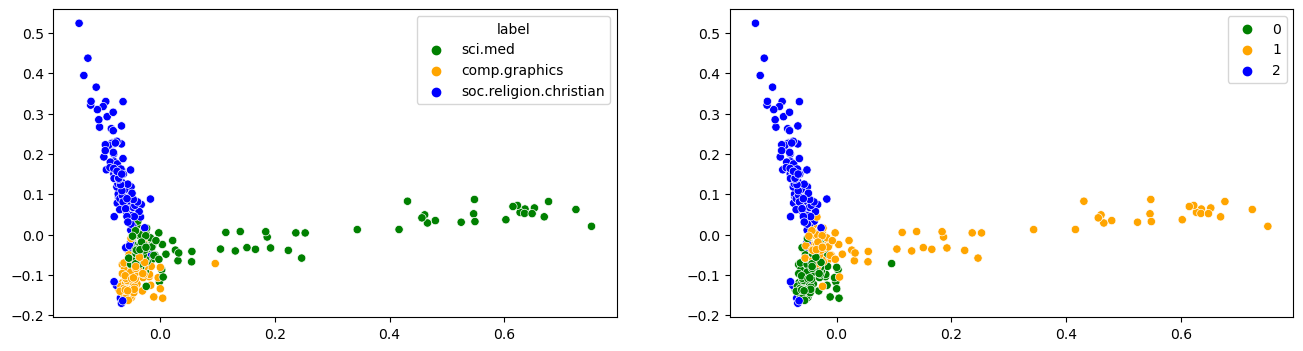

In [12]:
# Exercise 5.2.4 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(test_dtm.toarray())

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = test["label"], palette=['green','orange','blue'] )

plt.subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = predicted, palette=['green','orange','blue'] )
plt.show()

### 5.3. Clustering with sklearn package - Euclidean distance
- Compare its performance with NLTK Kmeans result
- Discuss: the difference between performance

In [13]:
# Exercise 5.3.1 Clustering with sklearn package - Euclidean distance
from sklearn.cluster import KMeans

# Kmeans with 20 different centroid seeds
km = KMeans(n_clusters=num_clusters, n_init=20, random_state = 42)\
.fit(dtm)
clusters = km.labels_.tolist()


In [14]:
# Exercise 5.3.2 Performance Evaluation

predicted = km.predict(test_dtm)

confusion_df = pd.DataFrame(list(zip(test["label"].values, predicted)),\
                            columns = ["label", "cluster"])
confusion_df.head()

# generate crosstab between clusters and true labels
pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)

,label,cluster
0,sci.med,0
1,sci.med,0
2,comp.graphics,0
3,sci.med,0
4,comp.graphics,0


label,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,107,105,21
1,0,1,99
2,0,23,0


<Figure size 1600x400 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

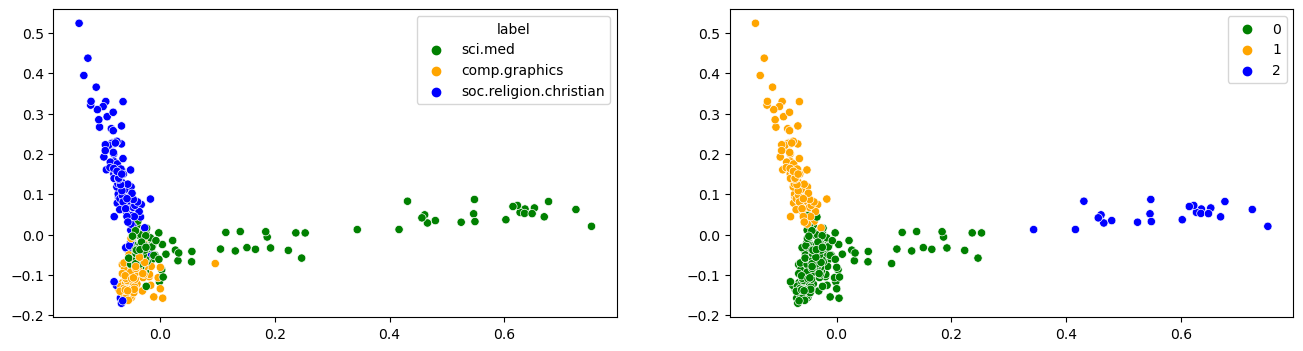

In [15]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = test["label"], palette=['green','orange','blue'] )

plt.subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = predicted, palette=['green','orange','blue'] )
plt.show()

- You may notice the significant performance difference caused by:
   - different distance measures: L2 distance vs. Cosine distance
   - high dimensionalties (curse of dimensionality)
- What could be possible ways to solve "curse of dimensionality"?


### 5.4. How to pick *K*, the number of clusters?
- **Try external valuation first!!!**
  - manually assess a subset of documents to create "ground truth"
- In case it is impossible to figure out how many clusters in the data set manually, **theorectically**, *K* may be selected as follows:
  * Select a metric to measure the "goodness" of clusters, e.g. average radius, average diameter, etc.
  * Varying *K* from 2 to N, perform clustering for each *K*
  * Ideally, as *K* increases to some point, the metric should grow slowly (**elbow method**)

<img style="float: left;" src='best_k.png'  width='40%'/><img  src='sample1.png' width='30%'/>
source: http://infolab.stanford.edu/~ullman/mmds/ch7.pdf
- However, if samples do not have clear structures, this method may not work (elbow does not exist!)
<img src="samples2.png" width='20%'>

### 5.4. Gaussian Mixture Models (GMMs)

Often, samples may overlap with each other and there are no clear boundaries between clusters
<img src='gmm1.png' width = "50%">

Gaussian Mixture Model assumes each cluster follows a normal distribution. Notice that, in this example, 
- 1 Gaussian may not fit the data
- 2 Gaussians may fit the data better. Each Gaussian can be a cluster
- GMM uses a well established mathematical algorithm called `expectation-maximization (EM)` to estimate the cluster for each sample. This class category is also called `latent variable`

<img src='gmm2.png' width = "80%">

#### GMM Assumption:
GMM assumes samples follows a mixture of $k$ Gaussian distributions. Formally,
- Let $X = [x_1, x_2, ..., x_N]$ be a sample set, $Y=[1,2, ..., K]$ be cluster labels. For any $y \in Y $ and $x\in X $:
- `Cluster 0`: $p~(~x~|~y=1~)=\mathcal{N}(\mu_1,\,\Sigma_{1})$, 
- `Cluster 1`: $p~(~x~|~y=2~)=\mathcal{N}(\mu_2,\,\Sigma_{2})$  
- ...
- `Cluster k`: $p~(~x~|~y=k~)=\mathcal{N}(\mu_k,\,\Sigma_{k})$

With this setup, $p~(~x~)=\sum^K_{k=1}{p~(~y~=~k~)~p~(~x~|~y=k~)}$
<img src='gmm4.png' width = '40%'>

#### EM Algorithm
(1) Initialize $(\mu_1,\Sigma_{1}), (\mu_2,\Sigma_{2}),...,(\mu_K,\Sigma_{K}) $, and $\pi_k = p~(~y =k~) $, for $k=1,2, ..., K$, (i.e. proportion of each cluster). Often, we can initialize them using `KMeans`


(2) (`Expectation Step` or `E-Step`) Compute $p~(~y = k~|~x~)$, for $ k= 1, 2, ..., K$ i.e. how likely $x$ belongs to cluster $k$. This probability is used as `soft assignment` (compared to `hard assignment` in `KMeans`)


\begin{align}  p~(~y~|~x~) & = \frac{p~(~x~y~)}{p~(~x~)}  = \frac{p~(~x~|~y~)~p~(~y~)}{\sum_{y \in Y}~{p~(~x~y~)}} = \frac{p~(~x~|~y~)~p~(~y~)}{\sum_{y \in Y}{p~(~x~|~y~)~p~(~y~)}}~~ \text{(Bayes Rule)} \\
\\
               \text{e.g.,}~p~(y = 1 ~|~x~) & = \frac{p~(~x~|~y =1~)~p~(~y =1~)}{\sum^K_{k=1}{p~(~x~|~y =k~)~p~(~y =k~)}} ~~ \text{(How likely x belong to cluster 1)} \\
               \\
               & = \frac{p~(~x~|~y =1~)~\pi_1}{\sum^K_{k=1}{p~(~x~|~y =k~)~\pi_k}} \\
               \\
               \text{note, } p~(~x~|~y=k~) & =\mathcal{N}(\mu_j,\,\Sigma_{k})
\end{align}

(3) (`Maximization Step` or `M-Step`): Update $(\mu_1,\Sigma_1), (\mu_2,\Sigma_2),...,(\mu_k,\Sigma_k), (\pi_1, \pi_2, ..., \pi_k) $. This is similar to `Kmeans`, but consider $p~(~x~|~y=k~)$ as a weight 


\begin{align}
N_k & = \sum^n_{i=1}{p~(~y = k ~|~x_i~)}~~ \text{-- expected number of samples "softly" assigned to cluster}~k \\
\mu_k & = \frac{1}{N_k}\sum^n_{i=1}{p~(~y = k ~|~x_i~)~x_i}~~ \text{ -- weighted sum of}~ x ~\text{by its likelihood of belonging to cluster}~k  \\
& \text{Note, }\mu_k \text{ is calculated in a similar way as KMean, except that each sample is weighted by}~p~(~y = k ~|~x_i~)\\
\\
\Sigma_k & = \frac{1}{N_k}\sum^n_{i=1}{p~(~y = k ~|~x_i~)~(~x_i-\mu_k)~(~x_i-\mu_k)^T}~~ \text{ -- covariance matrix}  \\
\pi_k & = \frac{N_k}{N} ~~ \text{-- proportion of samples in cluster}~k
\end{align}

(4) Repeat `E-Step` and `M-Step` until $(\mu_1,\Sigma_1), (\mu_2,\Sigma_2),...,(\mu_k,\Sigma_k), (\pi_1, \pi_2, ..., \pi_k) $ converge

<img src='gmm3.png' width='80%'>

`Question`: Compared with KMeans, what differences can you observe in the clusters generated by GMM?

#### Metrics to measure Clustering model performance

- Let $LL$ be the log-likelihood of the model on the training dataset with $N$ samples, and $k$ is the number of parameters in the model.
    - In GMM model, $LL = \sum^N_{i=1}{\log{p~(~x_i~)}}$
    

- AIC (Akaike Information Criterion): 
$$ AIC = -2/N * LL + 2 * k/N $$

- BIC (Bayesian Information Criterion)
$$ BIC = -2 * LL + log(N) * k $$


- The smaller `AIC` or `BIC`, the better the model. In other words, a complex model is penalized due to its large number of parameters. 

In [16]:
from sklearn import mixture
import numpy as np

In [17]:
# We use a small scope of grid search to find the best parameters of GMM

lowest_bic = np.infty   # initial BIC is set to infinity
best_gmm = None

n_components_range = range(2,5)    # The number of clusters

cv_types = ['spherical', 'tied', 'diag']  # The covariance type, for details check https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic

for cv_type in cv_types:
    
    for n_components in n_components_range:
        
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state=42)
        gmm.fit(dtm.toarray())
        
        bic = gmm.bic(dtm.toarray())  # get Model BIC
        
        if bic < lowest_bic:  # save the model with lowest BIC sofar
            lowest_bic = bic
            best_gmm = gmm


GaussianMixture(covariance_type='spherical', n_components=2, random_state=42)

GaussianMixture(covariance_type='spherical', n_components=3, random_state=42)

GaussianMixture(covariance_type='spherical', n_components=4, random_state=42)

GaussianMixture(covariance_type='tied', n_components=2, random_state=42)

GaussianMixture(covariance_type='tied', n_components=3, random_state=42)

GaussianMixture(covariance_type='tied', n_components=4, random_state=42)

GaussianMixture(covariance_type='diag', n_components=2, random_state=42)

GaussianMixture(covariance_type='diag', n_components=3, random_state=42)

GaussianMixture(covariance_type='diag', n_components=4, random_state=42)

In [18]:
# Show best model

lowest_bic
best_gmm

-67031598.978481606

GaussianMixture(covariance_type='diag', n_components=4, random_state=42)

In [19]:
# Predict clusters for testing samples

test_dtm = tfidf_vect.transform(test["text"])

predicted = best_gmm.predict(test_dtm.toarray())
predicted[0:5]

array([1, 1, 1, 1, 0])

<Figure size 1600x400 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

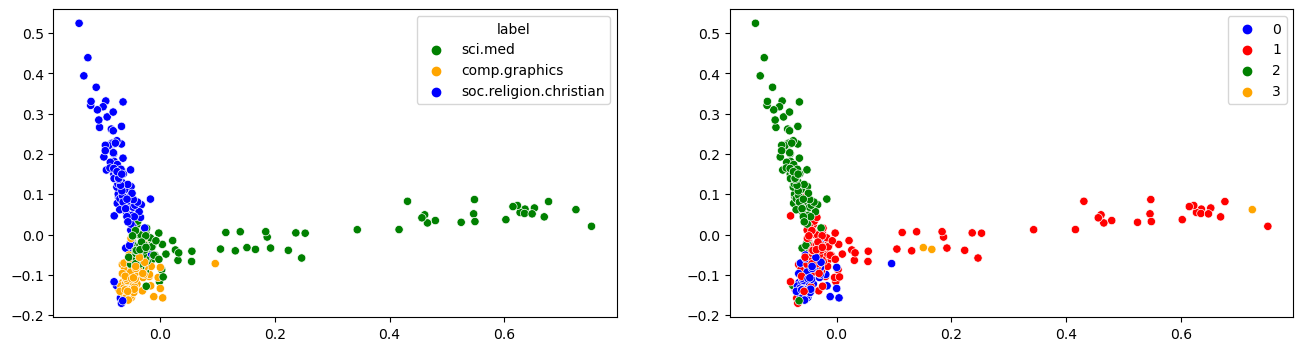

In [20]:
# Visualize actual labels and clusters
# Note, the plot with reduce dimensionality may not reflect 
# the real distribution of samples in the high-dimension space

pca = PCA(n_components=2)
X = pca.fit_transform(test_dtm.toarray())

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = test["label"], palette=['green','orange','blue'] )

plt.subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue = predicted, palette=['blue','red','green','orange'] )
plt.show()

In [21]:
# Generate confusion table

confusion_df = pd.DataFrame(list(zip(test["label"].values, predicted)),\
                            columns = ["label", "cluster"])
confusion_df.head()

# generate crosstab between clusters and true labels
pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)

,label,cluster
0,sci.med,1
1,sci.med,1
2,comp.graphics,1
3,sci.med,1
4,comp.graphics,0


label,comp.graphics,sci.med,soc.religion.christian
cluster,,,
0,80,0,1
1,26,124,14
2,1,2,105
3,0,3,0


In [24]:
cluster_dict

{0: 'soc.religion.christian', 1: 'sci.med', 2: 'sci.med', 3: 'comp.graphics'}

In [22]:
#  Create the mapping and calculate performance

cluster_dict={0:'soc.religion.christian', 1:"sci.med",2:"sci.med",\
              3:'comp.graphics'}

# Map true label to cluster id
predicted_target=[cluster_dict[i] \
                  for i in predicted]

print(metrics.classification_report\
      (test["label"], predicted_target))



                        precision    recall  f1-score   support

         comp.graphics       0.00      0.00      0.00       107
               sci.med       0.46      0.98      0.63       129
soc.religion.christian       0.01      0.01      0.01       120

              accuracy                           0.36       356
             macro avg       0.16      0.33      0.21       356
          weighted avg       0.17      0.36      0.23       356

